In [1]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Embedding, GRU, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
import numpy as np

In [30]:
data = pd.read_pickle('./datasets/train_data_100.pickle')
data_test = pd.read_pickle('./datasets/test_data_100.pickle')

In [31]:
texts = [' '.join(d) for d in data['text'].to_list()]
labels = data['genre'].to_list()

texts_test = [' '.join(d) for d in data_test['text'].to_list()]
labels_test = data_test['genre'].to_list()

In [4]:
texts

['чэндлеp раймонд глубокий сон 1 половина октябрь около одиннадцать утро хмурый типичный это время год предгорие день предвещать холодный секущий дождь светлоголубой рубашка соответствовать галстук платочек кармашек чёрный брюки чёрный носка голубой узор элегантный чистый свежевыбритый полный спокойствие беспокоиться впечатление это производить выглядеть точно должный выглядеть одетый частный детектив идти визит четыре миллион доллар большой холл семейный дом стернвуд этаж высота дверь который легко пройти стадо индийский слон размещаться витраж изображать рыцарь чёрный лата спасать дама привязать дерево дама раздетый нагоя тело окутывать покрывало волос удобство рыцарь поднять забрало пытаться усилие развязать верёвка который дама привязать дерево смотреть витраж думать жить',
 "дом рано поздно прийтись влезть наверх помочь рыцарь похоже делать свой дело всерьёз огромный застеклить дверь сторона холл широкий изумрудный газон простираться вплоть белый гараж который молодой щуплый черно

In [32]:
texts_test

['кейся хилла табу пролог залив сан-франциско калифорния рискнуть рейли умолять забыть джесс стать делать понятно рейли идти дорога тянуться школа дом вслед младший сестра бежать вприпрыжку толстенький короткий косичка задорно подпрыгивать такт шаг рейли терпеть мочь забирать младший сестра школа это время друг прогуливаться мол вместо присоединиться должный забирать джесс провожать дом кормить усаживать урок отец требовать держаться далёкий добавить впереди ярд двадцать медленно ходить конец конец свой двор старик сгребать опасть лист сгорбить старый фланелевый рубашка грязный комбинезон сжимать мозолистый заскорузлый ладонь рукоятка грабли стоять осень лист желтеть опадать дерево солнце каждый день подниматься небо ниже джесс посмотреть рейли ясный',
 'голубой глаз сестрёнка шаловливо поблескивать бросить ты… сказать что-нибудь слышать говорить должный разговаривать это человек почему рейли раздражённо фыркнуть « почему » джесс почему должный разговаривать мистер рейнолдсом рейли взг

In [5]:
maxlen = 100  #Отсечение остатка после 100-го слова
max_words = 10000

In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [33]:
tokenizer_test = Tokenizer(num_words=max_words)
tokenizer_test.fit_on_texts(texts_test)
sequences_test = tokenizer.texts_to_sequences(texts_test)

In [7]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 53219 unique tokens.


In [34]:
word_index_test = tokenizer_test.word_index
print('Found %s unique tokens.' % len(word_index_test))

Found 18487 unique tokens.


In [36]:
d = pad_sequences(sequences, maxlen=maxlen)
d_test = pad_sequences(sequences_test, maxlen=maxlen)

In [9]:
labels = np.asarray(labels)
print('Shape of data tensor:', d.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (14409, 100)
Shape of label tensor: (14409,)


In [37]:
labels_test = np.asarray(labels_test)
print('Shape of data tensor:', d_test.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (1805, 100)
Shape of label tensor: (1805,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d, labels,
                                                    train_size=0.67,
                                                    random_state=42,
                                                    stratify=labels)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [2644 5247 1763]
Количество строк в y_test по классам: [1302 2585  868]


In [39]:
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(d_test, labels_test,
                                                    train_size=3,
                                                    random_state=42,
                                                    stratify=labels_test)
print(f"Количество строк в y_train по классам: {np.bincount(y_train_test)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test_test)}")

Количество строк в y_train по классам: [1 1 1]
Количество строк в y_test по классам: [622 717 463]


In [50]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test_test = to_categorical(y_test_test)

In [12]:
# sentences = list(map(list, data['text'].to_list()))
# model_w2v = Word2Vec(sentences=sentences, vector_size=100, sg=0, window=10, epochs=5, min_count=10, workers=4)
# model_w2v.save('./models/model_w2v.w2v')
model_w2v = Word2Vec.load('./models/model_w2v.w2v')

In [14]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        if word in model_w2v.wv.key_to_index:
            embedding_vector = model_w2v.wv.get_vector(word)
        else:
            embedding_vector = np.zeros(embedding_dim)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [15]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1888762 ,  0.58320308,  0.26507655, ..., -1.25532854,
         0.11306992,  1.24214518],
       [-1.6713419 ,  0.989887  ,  0.1383269 , ..., -0.55382746,
        -0.04980406,  0.47990805],
       ...,
       [-0.03602665,  0.12445448,  0.06156644, ..., -0.13681443,
         0.06839494,  0.13190131],
       [ 0.00232697,  0.03287196,  0.04246398, ..., -0.04966859,
        -0.06785379,  0.10233437],
       [-0.0894557 ,  0.19240478,  0.1181412 , ..., -0.15561093,
         0.0688927 ,  0.11995248]])

In [16]:
output_dir_ann = 'model_output/dense/'
# обучение:
epochs_ann = 10
batch_size_ann = 64
# архитектура полносвязанной сети:
n_dense_ann = 100
dropout_ann = 0.5

In [17]:
output_dir_cnn = 'model_output/cnn/'
# обучение:
epochs_cnn = 10
batch_size_cnn = 128

# архитектура сверточного слоя:
n_conv = 256  # фильтры, они же ядра
k_conv = 3  # длина ядра

# архитектура полносвязанного слоя:
n_dense_cnn = 256
dropout_cnn = 0.2

In [18]:
output_dir_gru = 'model_output/gru/'
# обучение:
epochs_gru = 10
batch_size_gru = 64
# архитектура полносвязанной сети:
drop_embed_gru = 0.2
n_gru = 256
drop_gru = 0.2

In [19]:
# имя каталога для сохранения результатов:
output_dir_lstm = 'model_output/lstm/'
# обучение:
epochs_lstm = 10
batch_size_lstm = 64
# архитектура полносвязанной сети:
drop_embed_lstm = 0.2
n_lstm = 256
drop_lstm = 0.2

In [20]:
model_ann = Sequential()
model_ann.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_ann.add(Flatten())
model_ann.add(Dense(n_dense_ann, activation='relu'))
model_ann.add(Dropout(dropout_ann))
model_ann.add(Dense(n_dense_ann, activation='relu'))
model_ann.add(Dropout(dropout_ann))
model_ann.add(Dense(3, activation='softmax'))
model_ann.layers[0].set_weights([embedding_matrix])
model_ann.layers[0].trainable = False

model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 100)               1000100   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 3

In [21]:
model_cnn = Sequential()
model_cnn.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_cnn.add(SpatialDropout1D(0.2))
model_cnn.add(Conv1D(n_conv, k_conv, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(n_dense_cnn, activation='relu'))
model_cnn.add(Dropout(dropout_cnn))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.layers[0].set_weights([embedding_matrix])
model_cnn.layers[0].trainable = False

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 98, 256)           77056     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)              

In [22]:
model_gru = Sequential()
model_gru.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_gru.add(SpatialDropout1D(drop_embed_gru))
model_gru.add(GRU(n_gru, dropout=drop_gru))
model_gru.add(Dense(3, activation='softmax'))
model_gru.layers[0].set_weights([embedding_matrix])
model_gru.layers[0].trainable = False

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 256)               274944    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,275,715
Trainable params: 275,715
Non-trainable params: 1,000,000
_________________________________________________________________


In [23]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_lstm.add(SpatialDropout1D(drop_embed_lstm))
model_lstm.add(LSTM(n_lstm, dropout=drop_lstm))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.layers[0].set_weights([embedding_matrix])
model_lstm.layers[0].trainable = False

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,366,339
Trainable params: 366,339
Non-trainable params: 1,000,000
_________________________________________________________________


In [24]:
callbacks_ann = [EarlyStopping(monitor='val_loss', patience=2),
                 ModelCheckpoint(filepath=output_dir_ann + 'best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks_cnn = [EarlyStopping(monitor='val_loss', patience=2),
                 ModelCheckpoint(filepath=output_dir_cnn + 'best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks_gru = [EarlyStopping(monitor='val_loss', patience=2),
                 ModelCheckpoint(filepath=output_dir_gru + 'best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks_lstm = [EarlyStopping(monitor='val_loss', patience=2),
                  ModelCheckpoint(filepath=output_dir_lstm + 'best_model.h5', monitor='val_loss', save_best_only=True)]

In [24]:
model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

# history_ann = model_ann.fit(X_train, y_train,
#                             epochs=10,
#                             batch_size=batch_size_ann,
#                             validation_split=0.2,
#                             callbacks=callbacks_ann)

In [25]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
# history_cnn = model_cnn.fit(X_train, y_train,
#                             epochs=10,
#                             batch_size=batch_size_cnn,
#                             validation_split=0.2,
#                             callbacks=callbacks_cnn)


In [26]:
model_gru.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
# history_gru = model_gru.fit(X_train, y_train,
#                             epochs=epochs_gru,
#                             batch_size=batch_size_gru,
#                             validation_split=0.2,
#                             callbacks=callbacks_gru)


In [27]:
model_lstm.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['acc'])
# history_lstm = model_lstm.fit(X_train, y_train,
#                               epochs=epochs_lstm,
#                               batch_size=batch_size_lstm,
#                               validation_split=0.2,
#                               callbacks=callbacks_lstm)


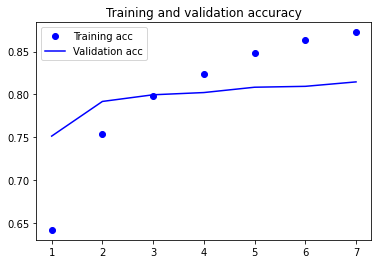

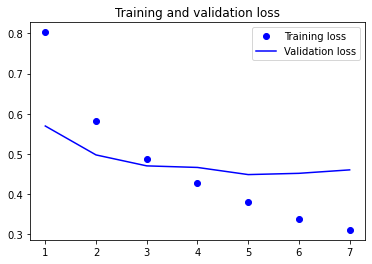

In [30]:
acc = history_ann.history['acc']
val_acc = history_ann.history['val_acc']
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

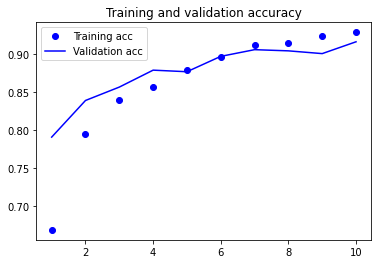

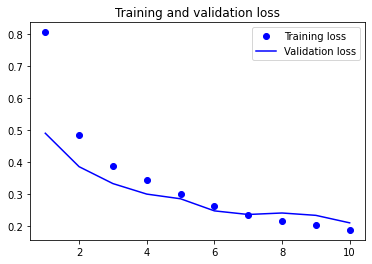

In [31]:
acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

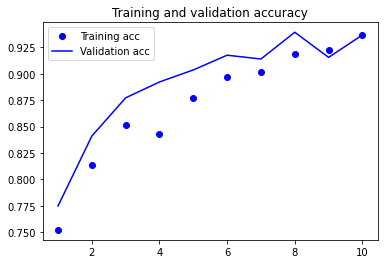

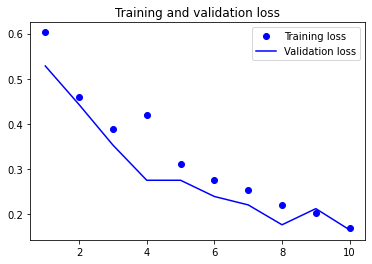

In [32]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

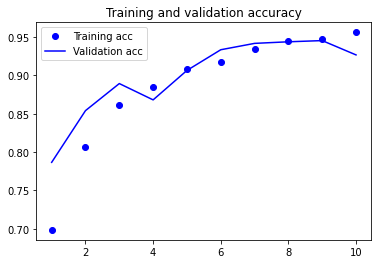

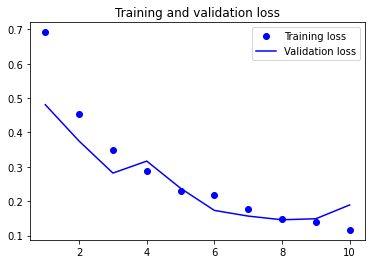

In [33]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
model_ann.load_weights(output_dir_ann + 'best_model.h5')
model_cnn.load_weights(output_dir_cnn + 'best_model.h5')
model_lstm.load_weights(output_dir_lstm + 'best_model.h5')
model_gru.load_weights(output_dir_gru + 'best_model.h5')

In [51]:
model_ann.evaluate(X_test, y_test)

149/149 [==============================] - 1s 7ms/step - loss: 0.4646 - acc: 0.8164


[0.46457475423812866, 0.8164038062095642]

In [41]:
model_ann.evaluate(X_test_test, y_test_test)

57/57 [==============================] - 2s 5ms/step - loss: 1.0038 - acc: 0.5494


[1.0038429498672485, 0.5493895411491394]

In [52]:
model_cnn.evaluate(X_test, y_test)

149/149 [==============================] - 2s 10ms/step - loss: 0.2152 - acc: 0.9138


[0.21524079144001007, 0.9137749671936035]

In [42]:
model_cnn.evaluate(X_test_test, y_test_test)

57/57 [==============================] - 1s 9ms/step - loss: 1.2981 - acc: 0.5211


[1.2981094121932983, 0.5210877060890198]

In [53]:
model_lstm.evaluate(X_test, y_test)

149/149 [==============================] - 22s 144ms/step - loss: 0.1430 - acc: 0.9457


[0.1429705023765564, 0.9457412958145142]

In [43]:
model_lstm.evaluate(X_test_test, y_test_test)

57/57 [==============================] - 10s 129ms/step - loss: 1.2516 - acc: 0.5494


[1.2515794038772583, 0.5493895411491394]

In [54]:
model_gru.evaluate(X_test, y_test)

149/149 [==============================] - 11s 73ms/step - loss: 0.1396 - acc: 0.9472


[0.13956855237483978, 0.9472134709358215]

In [44]:
model_gru.evaluate(X_test_test, y_test_test)

57/57 [==============================] - 6s 61ms/step - loss: 1.4123 - acc: 0.5388


[1.4122709035873413, 0.5388457179069519]

In [29]:
predicted_ann = model_ann.predict(X_test)
predicted_cnn = model_cnn.predict(X_test)
predicted_gru = model_gru.predict(X_test)
predicted_lstm = model_lstm.predict(X_test)

In [57]:
GENRES = {'detective': 0,
          'fantasy': 1,
          'sci-fi': 2
          }
genres_list = ['detective', 'fantasy', 'sci-fi']

In [58]:
genres_ann = []
for i in predicted_ann[:5]:
    genres_ann.append(genres_list[i.argmax()])

In [59]:
genres_cnn = []
for i in predicted_cnn[:5]:
    genres_cnn.append(genres_list[i.argmax()])

In [60]:
genres_lstm = []
for i in predicted_lstm[:5]:
    genres_lstm.append(genres_list[i.argmax()])

In [61]:
genres_gru = []
for i in predicted_gru[:5]:
    genres_gru.append(genres_list[i.argmax()])

In [62]:
genres_ann

['fantasy', 'fantasy', 'detective', 'detective', 'fantasy']

In [63]:
genres_cnn

['fantasy', 'sci-fi', 'sci-fi', 'detective', 'fantasy']

In [64]:
genres_lstm

['fantasy', 'fantasy', 'sci-fi', 'detective', 'fantasy']

In [65]:
genres_gru

['fantasy', 'fantasy', 'sci-fi', 'detective', 'fantasy']

In [66]:
y_test[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [67]:
text = tokenizer.sequences_to_texts(X_test[:5])

In [68]:
text

['готовый отложить наш расчёт эомер сын важно отозваться гимля выпасть случай увидеть галадриэль либо признать прекрасный свет либо выйти поединок сказать эомер пора однако простить слово знак прощение согласие спутник гэндальф поехать впереди вместе конунг конь твой позволение охотно двое согласный благодарный ответить вежливый речь гимля пусть друг леголаса ехать рядом решить сказать эомер слева поехать леголаса справа арагорн устоять против четверо светозар спросить гэндальф пастись река сказать никто близко вон близ переправа лёгкий тень мелькать гэндальф свистнуть громко конь светозар заржать ответ примчаться мгновение око западный ветер плоть сказать',
 'прорезать канал пепел возникнуть новый селение поле давать пышный урожай возвести стена время постройка цирк стена гигантский машина движение удивительный механизм сила знание мочь больший камень вызывать рост растение записать свой знание книга цветной пятно звёздный знак умереть последний пришелец земля уйти знание лишь двадцат